In [1]:
import numpy as np
from numba import njit, prange

import matplotlib.pyplot as plt

In [2]:
@njit(fastmath=True)
def reduce_density(points: np.ndarray, sep_factor: float, force_coeff: float, niter: int):
    for k in prange(niter):
        
        forces = np.zeros(points.shape)
        
        for i in prange(points.shape[0]):
            
            force_i = np.zeros(points.shape[1], dtype=float)
            
            for j in range(points.shape[0]):
                
                d = np.linalg.norm(points[i]-points[j])
                force_i += force_coeff*np.exp(-sep_factor*d)*(points[i]-points[j])
                
            forces[i] = force_i

        points += forces

In [7]:
N = 100

In [14]:
p = np.random.uniform(-1, 1, (N, 2))
p_copy = p.copy()

reduce_density(p_copy, 10, 0.1,  100)

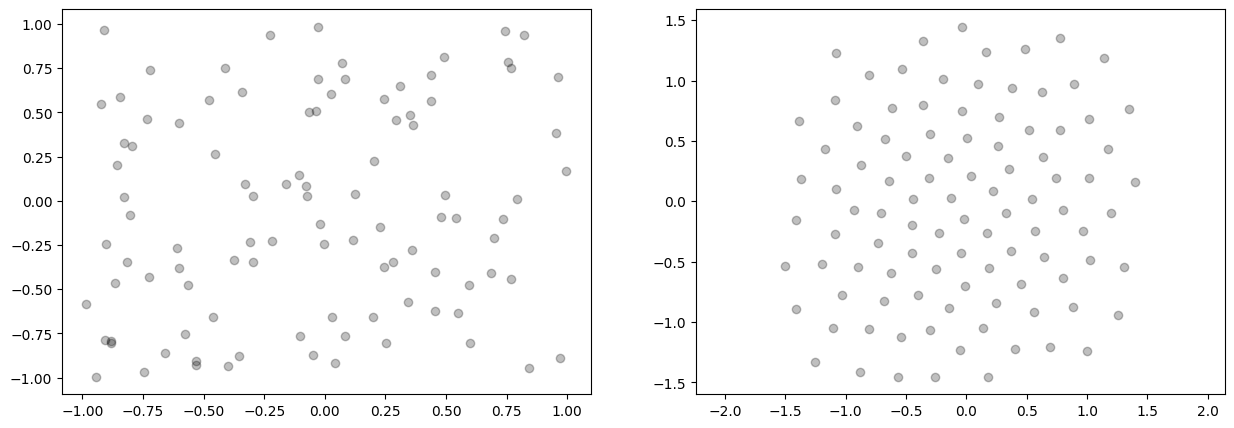

In [15]:
fig = plt.figure(figsize=(15, 5), dpi=100)
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

x1 = p[:, 0]
y1 = p[:, 1]

x2 = p_copy[:, 0]
y2 = p_copy[:, 1]

ax1.scatter(x1, y1, c='black', alpha=0.25)
ax2.scatter(x2, y2, c='black', alpha=0.25)

plt.axis('equal')
plt.autoscale()
plt.show()

In [6]:
# fig = plt.figure(figsize=(15, 5), dpi=100)
# ax = fig.add_subplot(projection='3d')

# x = p_copy[:, 0]
# y = p_copy[:, 1]
# z = p_copy[:,2]

# ax.scatter(x,y,z, )

# plt.show()